In [23]:
from sklearn.datasets import load_digits
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn import preprocessing

In [2]:
lr = LogisticRegression()

In [3]:
digits_dt = load_digits()

In [4]:
digits_dt

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [5]:
dir(digits_dt)

['DESCR', 'data', 'images', 'target', 'target_names']

In [6]:
digits_dt.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<Figure size 432x288 with 0 Axes>

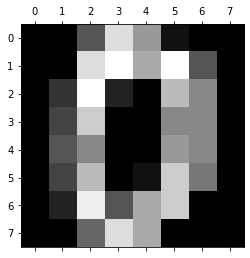

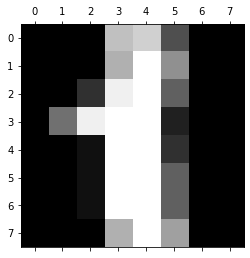

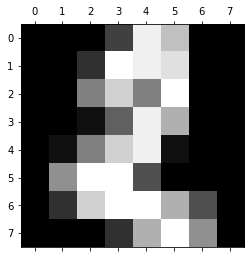

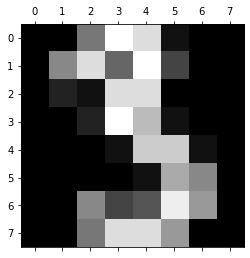

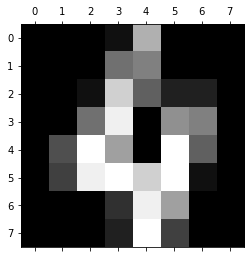

In [7]:
plt.gray() 
for i in range(5):
    plt.matshow(digits_dt.images[i])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(digits_dt.data,digits_dt.target, test_size=0.2)


In [16]:
X_train_scaled = preprocessing.scale(X_train)

In [17]:
Y_train_scaled = preprocessing.scale(y_train)

In [19]:
lr.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

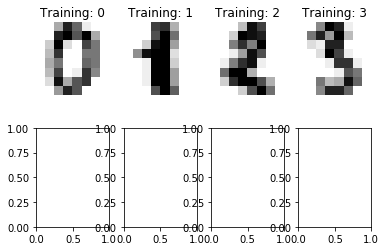

In [21]:
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits_dt.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [12]:
lr.score(X_test, y_test)

0.9611111111111111

In [20]:
lr.predict(digits_dt.data[0:5])

array([0, 1, 2, 3, 4])

#### Confusion Matrix

In [21]:
y_predicted = lr.predict(X_test)

In [22]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[30,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 23,  0,  1,  1,  0,  0,  0,  0,  0],
       [ 0,  1, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 40,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0, 35,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  1,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 31,  0,  0],
       [ 0,  0,  1,  1,  0,  0,  0,  0, 31,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  1, 42]], dtype=int64)

Text(69.0, 0.5, 'Truth')

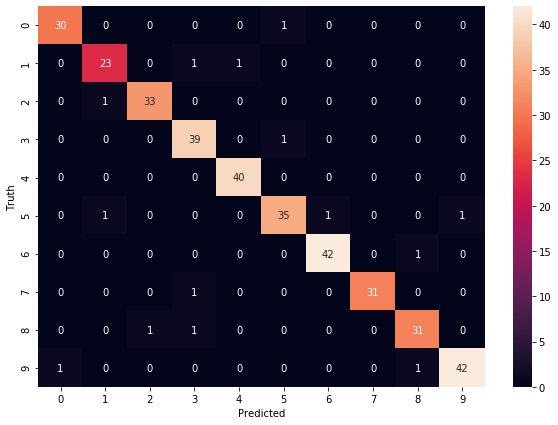

In [24]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')